In [21]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import matplotlib.patches as mpatches
from help_funcs import *

In [13]:
import matplotlib

matplotlib.rcParams.update({'font.size': 14})

In [9]:
with open('base/results/PV_0.3_spikes.pickle','rb') as f:
    all_spikes = pickle.load(f)

In [211]:
def plot_raster(all_spikes, tmin = 1000, tmax = 3000):
    
    blue_patch = mpatches.Patch(color='blue', label='PV ChR2 stim')
    black_patch = mpatches.Patch(color='black', label='visual stim')


    order = 1000

    # test out plotting code   
    fig, axes = plt.subplots(3,1,figsize = (12,15),gridspec_kw = {'height_ratios':[4,1,1]})

    ax0 = axes[0]
#     ax0.set_title('contrast=0, local PV stim = 0.1')
    ax0.set_ylabel('Exc',fontsize=15)
    ax0.set_xticks([])
    ax0.set_ylim([0,8*order])
    ax0.set_xlim([tmin,tmax])
    for i in range(8*order):
        spikeTimes = all_spikes[:8*order][i][all_spikes[:8*order][i]<tmax]
        spikeTimes = spikeTimes[spikeTimes>tmin]
        index = i*np.ones(len(spikeTimes))
        ax0.plot(spikeTimes, index, linestyle='',marker='o', color='black',markersize=0.5)
#     ax0.add_patch(plt.Polygon((np.array([[1900,-200],[tmin,0],[tmin+100,-200]])),clip_on=False,color='black'))
#     ax0.add_patch(plt.Polygon((np.array([[2400,-200],[tmin+500,0],[tmin+600,-200]])),clip_on=False,color='black'))
#     ax0.add_patch(plt.Polygon((np.array([[2900,-200],[tmin+1000,0],[3100,-200]])),clip_on=False,color='black'))
#     ax0.add_patch(plt.Polygon((np.array([[3400,-200],[3500,0],[3600,-200]])),clip_on=False,color='black'))
#     ax0.add_patch(plt.Polygon((np.array([[3900,-200],[4000,0],[4100,-200]])),clip_on=False,color='black'))

    ax1 = axes[1]
    ax1.set_xlim([tmin,tmax])
    ax1.set_ylim([0,order])
    ax1.set_ylabel('PV',fontsize=15)
    ax1.set_xticks([])
    for i in range(1000):
        spikeTimes = all_spikes[8*order:9*order][i][all_spikes[8*order:9*order][i]<tmax]
        spikeTimes = spikeTimes[spikeTimes>tmin]
        index = i*np.ones(len(spikeTimes))
        ax1.plot(spikeTimes, index, linestyle='',marker='o', color='black',markersize=0.5)
#     ax1.add_patch(plt.Polygon((np.array([[2400,-200],[2500,0],[2600,-200]])),clip_on=False,color='blue'))
#     ax1.add_patch(plt.Polygon((np.array([[3400,-200],[3500,0],[3600,-200]])),clip_on=False,color='blue'))
#     ax1.legend(handles=[blue_patch,black_patch], loc='center left', bbox_to_anchor=(1, 1.7), fontsize=18)

    ax2 = axes[2]
    ax2.set_ylim([0,order])
    ax2.set_xlim([tmin,tmax])
    ax2.set_ylabel('SST',fontsize=15)
    ax2.set_xlabel('time, t (ms)',fontsize=20)
    for i in range(1000):
        spikeTimes = all_spikes[9*order:][i][all_spikes[9*order:][i]<tmax]
        spikeTimes = spikeTimes[spikeTimes>tmin]
        index = i*np.ones(len(spikeTimes))
        ax2.plot(spikeTimes, index, linestyle='',marker='o', color='black',markersize=0.5)

    plt.show()

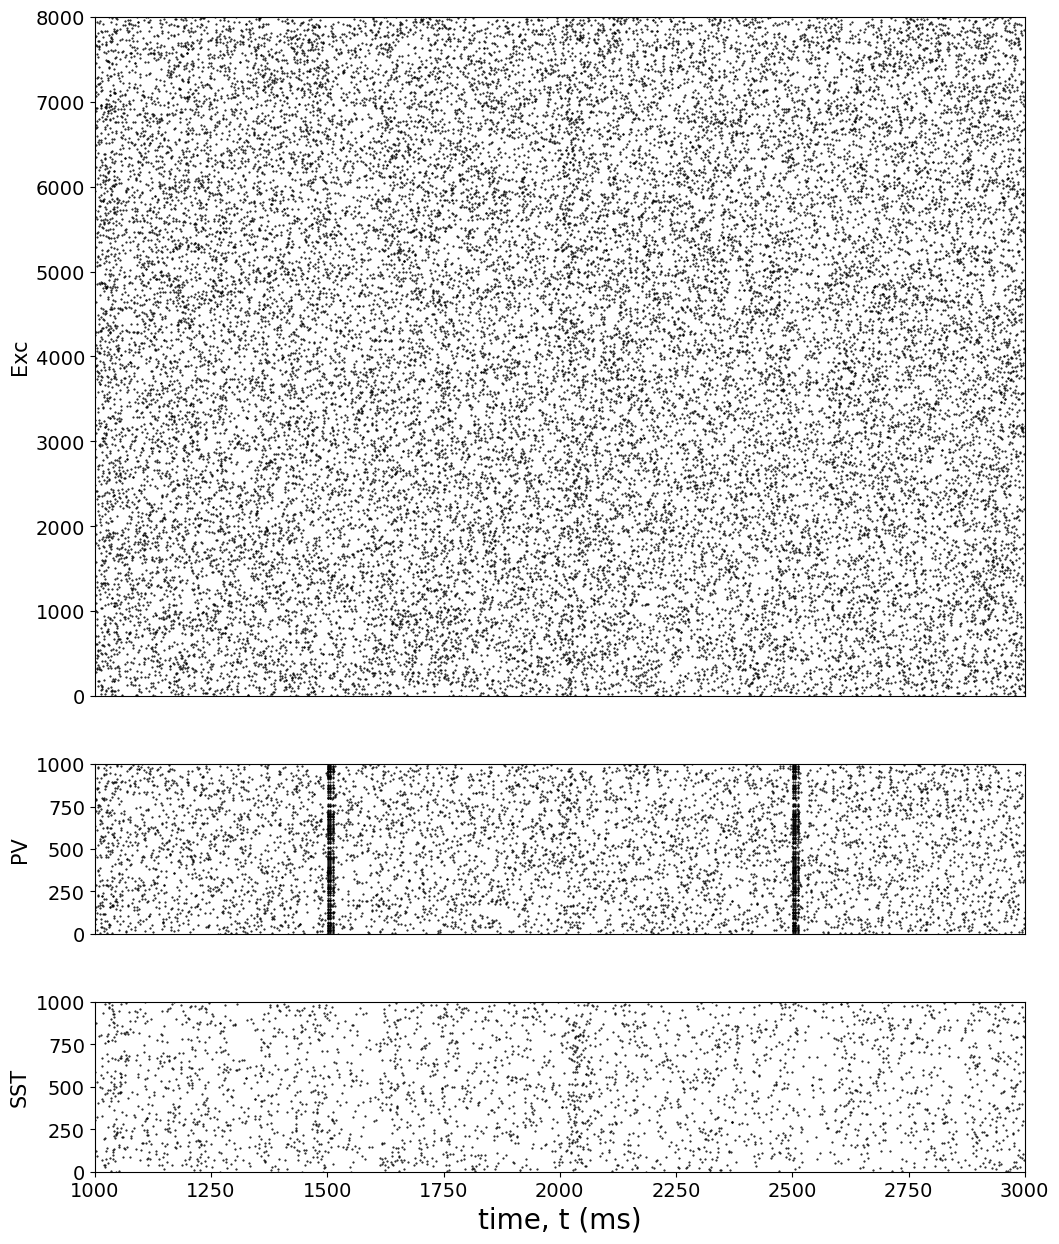

In [216]:
with open('base3/results/PV_0.3_spikes.pickle','rb') as f:
    all_spikes = pickle.load(f)
plot_raster(all_spikes)

In [23]:
def periodic_distance(p1, p2, L=1.0):
    """
    Calculates the periodic distance between two points on a 1x1 2-dimensional plane.

    Parameters
    ----------
    p1 : numpy array
        The first point, with shape (2,).
    p2 : numpy array
        The second point, with shape (2,).
    L : float
        The length of the periodic boundary, default value is 1.0.

    Returns
    -------
    distance : float
        The periodic distance between two points.
    """
    delta = np.abs(p1 - p2)
    delta = np.where(delta > L/2, L - delta, delta)
    return np.sqrt(np.sum(delta**2))


In [26]:
periodic_distance(np.array([0.35,0.9]), np.array([0.9,0.9]))

0.44999999999999996

In [78]:
import scipy.stats
def getStimRateMeans(exc_spikes, exc_positions):
    # store the control times and the chr2 stimulation times
    control_times = []
    chr_times = []
    ii = 0
    is_control = True
    while True:
        start_time = ii * 500 + 1000
        stop_time = start_time + 40
        if is_control:
            control_times.append(start_time)
        else:
            chr_times.append(start_time)   
        ii += 1
        if is_control:
            is_control = False
        else:
            is_control = True        
        if stop_time > 3000: break
#     print(control_times, chr_times)
    # compute the rates of the cells distal to the chr2 stimulus
    control_spikes = []
    chr_spikes = []
    center_pos = np.array([0.5,0.5])
    for ni in range(len(exc_positions)):
        pos_x, pos_y = exc_positions[ni,:]
        dist = np.sqrt((0.5-pos_x)**2 + (0.5-pos_y)**2)
        if dist > 0.2:
            continue
        nspikes = 0
        for tim in control_times:
            aa = exc_spikes[ni] [exc_spikes[ni] > tim ]
            aa = aa [aa < tim+40]
            nspikes += len(aa)
        control_spikes.append(nspikes)

        nspikes = 0
        for tim in chr_times:
            aa = exc_spikes[ni] [exc_spikes[ni] > tim ]
            aa = aa [aa < tim+40]
            nspikes += len(aa)
        chr_spikes.append(nspikes)
    control_rates = np.divide(control_spikes,(40/1000)) # convert from spike count to rate
    chr_rates = np.divide(chr_spikes,(40/1000))
    ctrl_mean = np.mean(control_rates)
    chr2_mean = np.mean(chr_rates)
    
    ctrl_err = scipy.stats.sem(control_rates)
    chr2_err = scipy.stats.sem(chr_rates)
    
    return [ctrl_mean, chr2_mean, ctrl_err, chr2_err]

In [232]:
contrasts = np.array([0.02, 0.05, 0.1, 0.2, 0.21])
# contrasts = np.array([0.02, 0.05, 0.2, 0.3])
# contrasts = np.array([0.02,  0.2])
ctrl_pv_curve = [[] for i in range(4)]
stim_pv_curve = [[] for i in range(4)]
ctrl_sst_curve = [[] for i in range(4)]
stim_sst_curve = [[] for i in range(4)]

ctrl_pv_curve_e = [[] for i in range(4)]
stim_pv_curve_e = [[] for i in range(4)]
ctrl_sst_curve_e = [[] for i in range(4)]
stim_sst_curve_e = [[] for i in range(4)]

folder = 'nl3b/results/'
for cont in contrasts:
   
    with open(folder + 'PV_%s_spikes.pickle'%cont, 'rb') as f:
        all_spikes = pickle.load(f)
    with open(folder + 'PV_%s_positions.pickle'%cont, 'rb') as f:
        all_positions = pickle.load(f)
        
    ctrlpv_E_mean, stimpv_E_mean, ctrlpv_E_err, stimpv_E_err = getStimRateMeans(all_spikes[:8000], all_positions[:8000])
    ctrlpv_P_mean, stimpv_P_mean, ctrlpv_P_err, stimpv_P_err = getStimRateMeans(all_spikes[8000:9000], all_positions[8000:9000])
    ctrlpv_S_mean, stimpv_S_mean, ctrlpv_S_err, stimpv_S_err = getStimRateMeans(all_spikes[9000:10000], all_positions[9000:10000])
    ctrlpv_A_mean, stimpv_A_mean, ctrlpv_A_err, stimpv_A_err = getStimRateMeans(all_spikes, all_positions)
    
    ctrl_pv_curve[0].append(ctrlpv_E_mean)
    ctrl_pv_curve[1].append(ctrlpv_P_mean)
    ctrl_pv_curve[2].append(ctrlpv_S_mean)
    ctrl_pv_curve[3].append(ctrlpv_A_mean)
    ctrl_pv_curve_e[0].append(ctrlpv_E_err)
    ctrl_pv_curve_e[1].append(ctrlpv_P_err)
    ctrl_pv_curve_e[2].append(ctrlpv_S_err)
    ctrl_pv_curve_e[3].append(ctrlpv_A_err)
    
    stim_pv_curve[0].append(stimpv_E_mean)
    stim_pv_curve[1].append(stimpv_P_mean)
    stim_pv_curve[2].append(stimpv_S_mean)
    stim_pv_curve[3].append(stimpv_A_mean)
    stim_pv_curve_e[0].append(stimpv_E_err)
    stim_pv_curve_e[1].append(stimpv_P_err)
    stim_pv_curve_e[2].append(stimpv_S_err)
    stim_pv_curve_e[3].append(stimpv_A_err)
    
    with open(folder + 'SOM_%s_spikes.pickle'%cont, 'rb') as f:
        all_spikes = pickle.load(f)
    with open(folder + 'SOM_%s_positions.pickle'%cont, 'rb') as f:
        all_positions = pickle.load(f)
        
    ctrlsst_E_mean, stimsst_E_mean, ctrlsst_E_err, stimsst_E_err = getStimRateMeans(all_spikes[:8000], all_positions[:8000])
    ctrlsst_P_mean, stimsst_P_mean, ctrlsst_P_err, stimsst_P_err = getStimRateMeans(all_spikes[8000:9000], all_positions[8000:9000])
    ctrlsst_S_mean, stimsst_S_mean, ctrlsst_S_err, stimsst_S_err = getStimRateMeans(all_spikes[9000:10000], all_positions[9000:10000])
    ctrlsst_A_mean, stimsst_A_mean, ctrlsst_A_err, stimsst_A_err = getStimRateMeans(all_spikes, all_positions)

    
    ctrl_sst_curve[0].append(ctrlsst_E_mean)
    ctrl_sst_curve[1].append(ctrlsst_P_mean)
    ctrl_sst_curve[2].append(ctrlsst_S_mean)
    ctrl_sst_curve[3].append(ctrlsst_A_mean)
    ctrl_sst_curve_e[0].append(ctrlsst_E_err)
    ctrl_sst_curve_e[1].append(ctrlsst_P_err)
    ctrl_sst_curve_e[2].append(ctrlsst_S_err)
    ctrl_sst_curve_e[3].append(ctrlsst_A_err)

    stim_sst_curve[0].append(stimsst_E_mean)
    stim_sst_curve[1].append(stimsst_P_mean)
    stim_sst_curve[2].append(stimsst_S_mean)
    stim_sst_curve[3].append(stimsst_A_mean)
    stim_sst_curve_e[0].append(stimsst_E_err)
    stim_sst_curve_e[1].append(stimsst_P_err)
    stim_sst_curve_e[2].append(stimsst_S_err)
    stim_sst_curve_e[3].append(stimsst_A_err)
contrasts = np.array([0.02, 0.05, 0.1, 0.2, 0.3])

In [70]:
from scipy.optimize import curve_fit

def linear_model(x, a, b):
    return a * x + b

# Fit the model
params, cov = curve_fit(linear_model, contrasts, ctrl_sst_curve[0], sigma=ctrl_sst_curve_e[0])

# Extract the parameters and their errors
a, b = params
a_err, b_err = np.sqrt(np.diag(cov))
print(a,a_err)

3.5890979022449767 2.1645898553307665


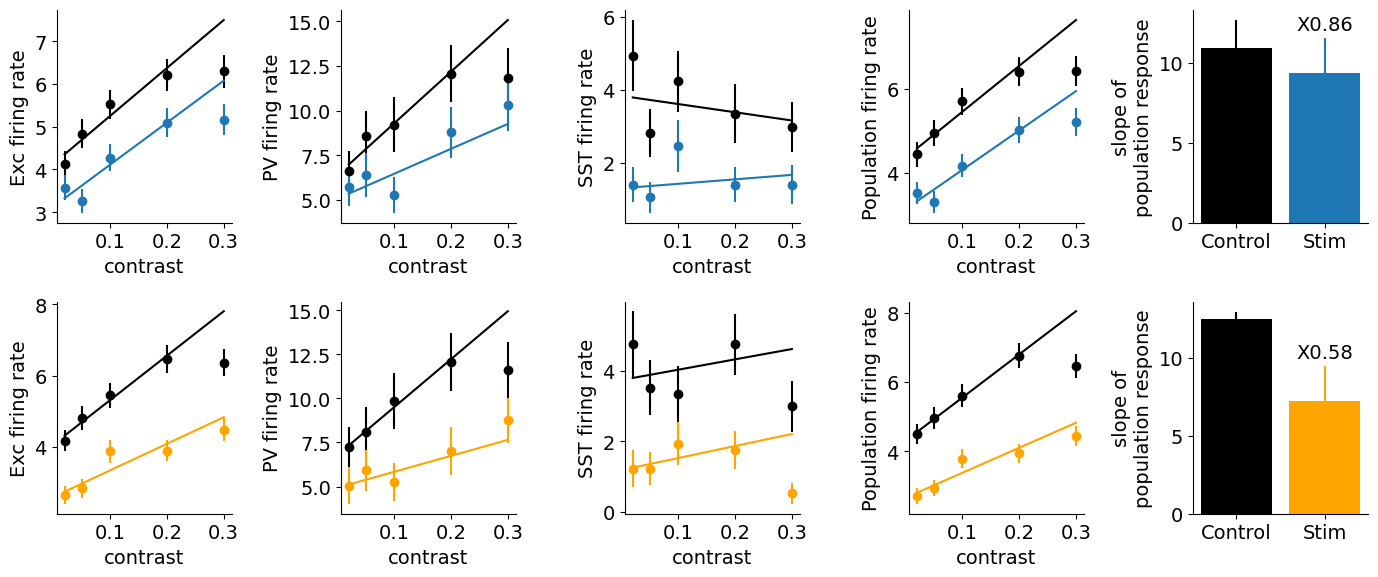

In [233]:
colors = {'ctrl_pv': 'black', 'stim_pv': 'tab:blue', 'ctrl_sst': 'black', 'stim_sst': 'orange'}

# define labels for PV and SST
labels = {'pv': 'PV stimulation', 'sst': 'SST stimulation'}

# define titles for E, P, and S
titles = {'E': 'Exc', 'P': 'PV', 'S': 'SST', 'A':'Population'}

# create subplots
fig, ax = plt.subplots(2, 5, figsize=(14, 6))

# loop over rows (PV and SST)
for i, y in enumerate(['pv', 'sst']):
    # loop over columns (E, P, and S)
    pop_slopes = []
    pop_errs = []
    for j, z in enumerate(['E', 'P', 'S', 'A']):
        # loop over ctrl and stim
        for x in ['ctrl', 'stim']:
            # get data from X_Y_Z arrays
            data = eval(f"{x}_{y}_curve[{j}]")
            errs = eval(f"{x}_{y}_curve_e[{j}]")
            # plot the data with specified color
            ax[i, j].errorbar(contrasts, data, yerr=errs, color=colors[f"{x}_{y}"], fmt='o')
            
            params, cov = curve_fit(linear_model, contrasts[:-1], data[:-1], sigma=errs[:-1])
            a, b = params
            a_err, b_err = np.sqrt(np.diag(cov))
            ax[i, j].plot(contrasts, contrasts*a + b, color=colors[f"{x}_{y}"])
            
            if z == 'A':
                pop_slopes.append(a)
                pop_errs.append(a_err)
#             ax[i, j].plot(contrasts, data, color=colors[f"{x}_{y}"])
        # set title for each subplot
#         ax[i, j].set_title(titles[z])
        ax[i, j].set_ylabel(f"{titles[z]} firing rate")
        ax[i, j].set_xlabel('contrast')
        ax[i,j].spines[['right', 'top']].set_visible(False)
        

    for j,x in enumerate(['ctrl', 'stim']):
        ax[i, 4].bar([j],pop_slopes[j], color=colors[f"{x}_{y}"])
        ax[i, 4].errorbar([j],pop_slopes[j],yerr=pop_errs[j], color=colors[f"{x}_{y}"])
    ax[i,4].set_ylabel('slope of\npopulation response')
    ax[i,4].set_xticks([0,1], ['Control', 'Stim'])
    ax[i,4].spines[['right', 'top']].set_visible(False)
    ax[i,4].text(1,pop_slopes[j]+pop_errs[j]+0.5,'X%.2f'%(pop_slopes[1]/pop_slopes[0]), horizontalalignment='center')

# set labels for each row
# ax[0, 0].set_ylabel(labels['pv'])
# ax[1, 0].set_ylabel(labels['sst'])
plt.tight_layout()

# show the plot
plt.savefig('result_figs/nl_long.eps')


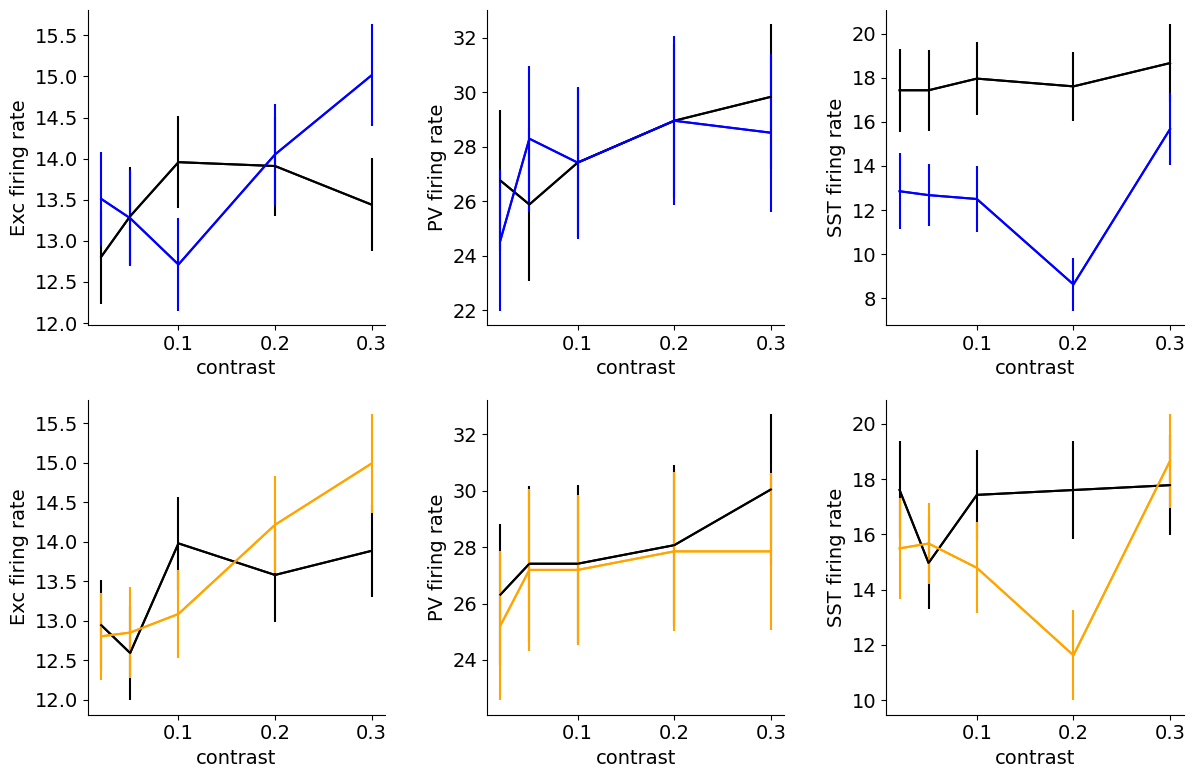

In [66]:
colors = {'ctrl_pv': 'black', 'stim_pv': 'blue', 'ctrl_sst': 'black', 'stim_sst': 'orange'}

# define labels for PV and SST
labels = {'pv': 'PV stimulation', 'sst': 'SST stimulation'}

# define titles for E, P, and S
titles = {'E': 'Exc', 'P': 'PV', 'S': 'SST'}

# create subplots
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

# loop over rows (PV and SST)
for i, y in enumerate(['pv', 'sst']):
    # loop over columns (E, P, and S)
    for j, z in enumerate(['Exc', 'PV', 'SST']):
        # loop over ctrl and stim
        for x in ['ctrl', 'stim']:
            # get data from X_Y_Z arrays
            data = eval(f"{x}_{y}_curve[{j}]")
            errs = eval(f"{x}_{y}_curve_e[{j}]")
            # plot the data with specified color
            ax[i, j].errorbar(contrasts, data, yerr=errs, color=colors[f"{x}_{y}"])
            ax[i, j].plot(contrasts, data, color=colors[f"{x}_{y}"])
        # set title for each subplot
#         ax[i, j].set_title(titles[z])
        ax[i, j].set_ylabel(f"{z} firing rate")
        ax[i, j].set_xlabel('contrast')
        ax[i,j].spines[['right', 'top']].set_visible(False)

# set labels for each row
# ax[0, 0].set_ylabel(labels['pv'])
# ax[1, 0].set_ylabel(labels['sst'])
plt.tight_layout()

# show the plot
plt.show()
